# Lab 08

#### Q1 (a)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Week8Q1.csv')
df

,Fruit ID,Weight (grams),Sweetness Level,Label (Fruit Type)
0,1,180,7,Apple
1,2,200,6,Apple
2,3,150,4,Orange
3,4,170,5,Orange
4,5,160,6,Apple
5,6,140,3,Orange


In [3]:
new_fruit = np.array([165, 5.5])
new_fruit

array([165. ,   5.5])

In [4]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [5]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

In [6]:
def minkowski_distance(a, b, p):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

In [7]:
distances = []

In [8]:
for _, row in df.iterrows():
    weight = row['Weight (grams)']
    sweetness = row['Sweetness Level']
    label = row['Label (Fruit Type)']
    euc_dist = euclidean_distance(new_fruit, np.array([weight, sweetness]))
    man_dist = manhattan_distance(new_fruit, np.array([weight, sweetness]))
    mink_dist = minkowski_distance(new_fruit, np.array([weight, sweetness]), p=3)
    distances.append((euc_dist, man_dist, mink_dist, label))

In [9]:
distances.sort(key=lambda x: x[0])

In [10]:
distances

[(5.024937810560445, 5.5, 5.001666111419547, 'Orange'),
 (5.024937810560445, 5.5, 5.001666111419547, 'Apple'),
 (15.074813431681335, 16.5, 15.00499833425864, 'Apple'),
 (15.074813431681335, 16.5, 15.00499833425864, 'Orange'),
 (25.124689052802225, 27.5, 25.008330557097732, 'Orange'),
 (35.00357124637428, 35.5, 35.00003401357238, 'Apple')]

In [11]:
k = 3
nearest_neighbors = distances[:k]

In [12]:
label_count = {}

In [13]:
for neighbor in nearest_neighbors:
    label = neighbor[3]
    if label in label_count:
        label_count[label] += 1
    else:
        label_count[label] = 1

In [14]:
predicted_label = max(label_count, key=label_count.get)

In [15]:
predicted_label

'Apple'

In [16]:
print("Distances (Euclidean, Manhattan, Minkowski, Label):")
for distance in distances:
    print(f"Euclidean: {distance[0]:.2f}, Manhattan: {distance[1]:.2f}, Minkowski: {distance[2]:.2f}, Label: {distance[3]}")
print(f"\nPredicted label for the new fruit: {predicted_label}")

Distances (Euclidean, Manhattan, Minkowski, Label):
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Orange
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: Orange
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: Apple

Predicted label for the new fruit: Apple


In [17]:
def knn_predict(new_fruit, k):
    distances = []
    for i, row in df.iterrows():
        weight = row['Weight (grams)']
        sweetness = row['Sweetness Level']
        label = row['Label (Fruit Type)']
        euc_dist = euclidean_distance(new_fruit, np.array([weight, sweetness]))
        distances.append((euc_dist, label))
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    label_count = {}
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
    
    return max(label_count, key=label_count.get)
for k in [1, 5]:
    print(f"Predicted label for k={k}: {knn_predict(new_fruit, k)}")

Predicted label for k=1: Orange
Predicted label for k=5: Orange


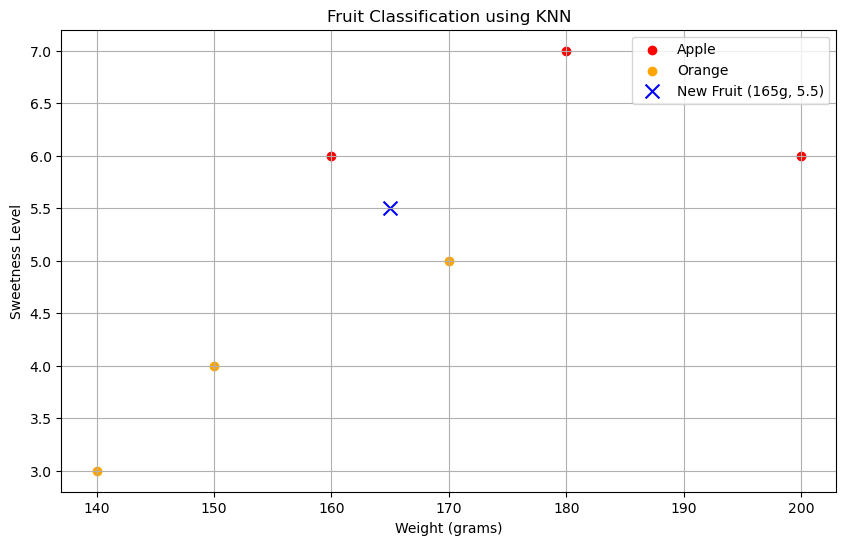

In [18]:
plt.figure(figsize=(10, 6))
colors = {'Apple': 'red', 'Orange': 'orange'}
for label in df['Label (Fruit Type)'].unique():
    plt.scatter(df['Weight (grams)'][df['Label (Fruit Type)'] == label], df['Sweetness Level'][df['Label (Fruit Type)'] == label], color=colors[label], label=label)
plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit (165g, 5.5)')
plt.title('Fruit Classification using KNN')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.legend()
plt.grid()
plt.show()

#### Q1 (b)

In [19]:
X = df[['Weight (grams)', 'Sweetness Level']].values
y = df['Label (Fruit Type)'].values

In [20]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [21]:
new_fruit = np.array([[165, 5.5]])
predicted_label = knn.predict(new_fruit)

In [22]:
predicted_label

array(['Orange'], dtype=object)

In [23]:
euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

In [24]:
euclidean_distances.flatten()

array([15.07481343, 35.00357125, 15.07481343,  5.02493781,  5.02493781,
       25.12468905])

In [25]:
manhattan_distances.flatten()

array([16.5, 35.5, 16.5,  5.5,  5.5, 27.5])

In [26]:
minkowski_distances.flatten()

array([15.00499833, 35.00003401, 15.00499833,  5.00166611,  5.00166611,
       25.00833056])

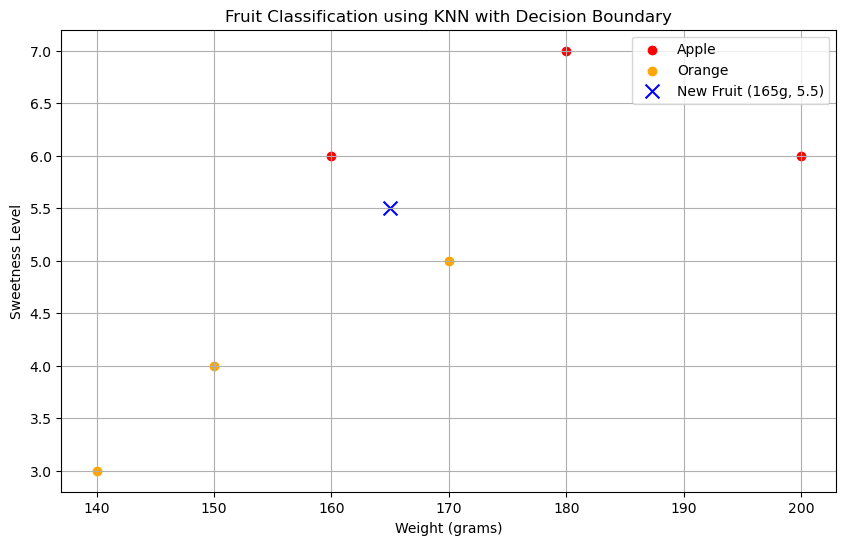

In [27]:
plt.figure(figsize=(10, 6))
colors = {'Apple': 'red', 'Orange': 'orange'}
for label in df['Label (Fruit Type)'].unique():
    plt.scatter(X[df['Label (Fruit Type)'] == label, 0], X[df['Label (Fruit Type)'] == label, 1], color=colors[label], label=label)
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='blue', marker='x', s=100, label='New Fruit (165g, 5.5)')
plt.title('Fruit Classification using KNN with Decision Boundary')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.legend()
plt.grid()
plt.show()

#### Q2

In [34]:
data = pd.read_csv('Week8Q2.csv')
data

,PatientID,Age,BloodPressure,Cholesterol,Diagnosis
0,1,30,High,High,Sick
1,2,45,Low,Normal,Healthy
2,3,50,High,High,Sick
3,4,35,Low,Normal,Healthy
4,5,60,High,High,Sick
5,6,55,Low,Normal,Healthy
6,7,40,High,High,Sick
7,8,25,Low,Normal,Healthy
8,9,65,High,High,Sick
9,10,45,Low,Normal,Healthy


In [35]:
def entropy(labels):
    value_counts = labels.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

In [36]:
def information_gain(data, feature):
    total_entropy = entropy(data['Diagnosis'])
    weighted_entropy = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        prob = len(subset) / len(data)
        weighted_entropy += prob * entropy(subset['Diagnosis'])
    return total_entropy - weighted_entropy

In [37]:
ig_age = information_gain(data, 'Age')
ig_bp = information_gain(data, 'BloodPressure')
ig_chol = information_gain(data, 'Cholesterol')

In [38]:
ig_age

0.9999999985573051

In [39]:
ig_bp

0.9999999985573051

In [40]:
ig_chol

0.9999999985573051

In [41]:
def predict(patient):
    blood_pressure = patient['BloodPressure']
    if blood_pressure == 'High':
        return 'Sick'
    else:
        return 'Healthy'

In [42]:
patient = pd.Series({'PatientID': 11, 'Age': 50, 'BloodPressure': 'Low', 'Cholesterol': 'Normal'})
prediction = predict(patient)

In [43]:
prediction

'Healthy'